In [ ]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot

In [ ]:
# ler a base de dados usada sem utilizar pandas, usando series.
filename='/content/drive/My Drive/Análise de dados/arquivosCSV/champagne.csv'
series = read_csv(filename, header=0, index_col=0, parse_dates=True, squeeze=True)

In [ ]:
series.head()


Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

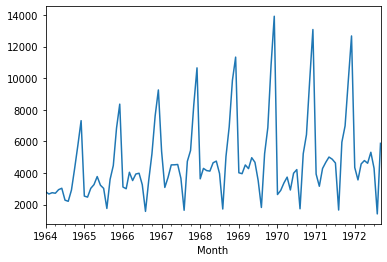

In [ ]:
series.plot()

In [ ]:
# cria um objeto rolling de janela igual a 3
rolling = series.rolling(window=3)

In [ ]:
rolling

Rolling [window=3,center=False,axis=0]

In [ ]:
# calcula a média da janela
rolling_mean = rolling.mean()

In [ ]:
# imprime o objeto rolling_mean
print(rolling_mean.head())

Month
1964-01-01            NaN
1964-02-01            NaN
1964-03-01    2747.333333
1964-04-01    2716.000000
1964-05-01    2807.333333
Name: Sales, dtype: float64


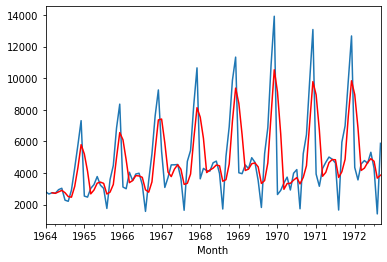

In [ ]:
# plot os dados originais e os dados da média móvel 
series.plot()
rolling_mean.plot(color='red')
pyplot.show()

In [ ]:

import plotly
import plotly.offline as py
from plotly.offline import plot, iplot
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [ ]:
# habilita o renderizador do colab
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

In [ ]:
vendas = go.Scatter(
                x=series.index,
                y=series.values,
                name = "Vendas Mensais",
                line = dict(color = '#FF8000'),
                opacity = 0.8)

MM_3 = go.Scatter(
                x=rolling_mean.index,
                y=rolling_mean.values,
                name = "Média Móvel 3 Períodos",
                line = dict(color = '#FF00FF'),
                opacity = 0.8)

data = [vendas, MM_3]

layout = dict(
    title = "Valores de vendas vs Média Móvel",
    title_x= 0.5
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

### Previsões com Média Móvel

1. Solução simples (walk-forward)
2. Interessante para se criar baselines.
3. Pode se usar Janelas Deslizantes para trabalhar com dados quentes.

In [ ]:
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error

In [ ]:
series

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
              ... 
1972-05-01    4618
1972-06-01    5312
1972-07-01    4298
1972-08-01    1413
1972-09-01    5877
Name: Sales, Length: 105, dtype: int64

In [ ]:

# Define uma janela de 3 elementos
window = 3

In [ ]:
# Obtem os 3 primeiros valores da serie
history = [series.values[i] for i in range(window)]

In [ ]:
range(window)

range(0, 3)

In [ ]:
# imprime a variável history
history

[2815, 2672, 2755]

In [ ]:
# Obtem todos os valores após os tres primeiros.
# range(3, tamanho_da_serie)

test = [series.values[i] for i in range(window, len(series.values))]

In [ ]:
# imprime a variável test
# 10 primeiros valores da série após o history
test[:10]

[2721, 2946, 3036, 2282, 2212, 2922, 4301, 5764, 7312, 2541]

In [ ]:
# serie original
series.values

array([ 2815,  2672,  2755,  2721,  2946,  3036,  2282,  2212,  2922,
        4301,  5764,  7312,  2541,  2475,  3031,  3266,  3776,  3230,
        3028,  1759,  3595,  4474,  6838,  8357,  3113,  3006,  4047,
        3523,  3937,  3986,  3260,  1573,  3528,  5211,  7614,  9254,
        5375,  3088,  3718,  4514,  4520,  4539,  3663,  1643,  4739,
        5428,  8314, 10651,  3633,  4292,  4154,  4121,  4647,  4753,
        3965,  1723,  5048,  6922,  9858, 11331,  4016,  3957,  4510,
        4276,  4968,  4677,  3523,  1821,  5222,  6872, 10803, 13916,
        2639,  2899,  3370,  3740,  2927,  3986,  4217,  1738,  5221,
        6424,  9842, 13076,  3934,  3162,  4286,  4676,  5010,  4874,
        4633,  1659,  5951,  6981,  9851, 12670,  4348,  3564,  4577,
        4788,  4618,  5312,  4298,  1413,  5877])

In [ ]:
# obtem o tamanho da lista history
length = len(history)
print (length)

3


In [ ]:
# obtem o inicio da range
print (length - window)

0


In [ ]:
# percorre history (3 ultimos elementos)
[history[i] for i in range(length - window, length)]

[2815, 2672, 2755]

In [ ]:
# calcula a média do 3 ultimos valores de history
mean([history[i] for i in range(length - window, length)])

2747.3333333333335

In [ ]:
# atualiza a lista history
valor_real = 2721
history.append(valor_real)

## Previsão com Média Móvel - Janela deslizante

In [ ]:
# Define uma variavel chamada X que é a copia da serie de dados
X = series.values

# Define a variável window = 3 que será a janela de 3 valroes
window = 3

# Obtem os 3 primeiros valores da serie
history = [X[i] for i in range(window)]

# Obtem todos os valores após os tres primeiros.
test = [X[i] for i in range(window, len(X))]

# cria lista de predições
predicoes = []

# percorre sobre os dados de teste...

for t in range(len(test)):
  # define a variavel length com o tamanho da variável history
  length = len(history)
  
  # define a variável valor_predito com a média dos 3 valores correntes..                                                           
  valor_predito = mean([history[i] for i in range(length - window, length)])        
  
  # define a variável valor_real com o valor atual do teste..
  valor_real = test[t]                                                              
  
  # alimenta a lista de predicoes
  predicoes.append(valor_predito)                                                  
  
  # atualiza a lista history com os valores correntes..
  history.append(valor_real)                                                        
  
  # imprime o valor predito e o real...
  print('Valor predito=%f, Valor real=%f' % (valor_predito, valor_real))

Valor predito=2747.333333, Valor real=2721.000000
Valor predito=2716.000000, Valor real=2946.000000
Valor predito=2807.333333, Valor real=3036.000000
Valor predito=2901.000000, Valor real=2282.000000
Valor predito=2754.666667, Valor real=2212.000000
Valor predito=2510.000000, Valor real=2922.000000
Valor predito=2472.000000, Valor real=4301.000000
Valor predito=3145.000000, Valor real=5764.000000
Valor predito=4329.000000, Valor real=7312.000000
Valor predito=5792.333333, Valor real=2541.000000
Valor predito=5205.666667, Valor real=2475.000000
Valor predito=4109.333333, Valor real=3031.000000
Valor predito=2682.333333, Valor real=3266.000000
Valor predito=2924.000000, Valor real=3776.000000
Valor predito=3357.666667, Valor real=3230.000000
Valor predito=3424.000000, Valor real=3028.000000
Valor predito=3344.666667, Valor real=1759.000000
Valor predito=2672.333333, Valor real=3595.000000
Valor predito=2794.000000, Valor real=4474.000000
Valor predito=3276.000000, Valor real=6838.000000


In [ ]:

# calcula a métrica de rmse
rmse = sqrt(mean_squared_error(test, predicoes))

In [ ]:
# imprime o valor de rmse
print('Métrica RMSE: %.3f' % rmse)

Métrica RMSE: 2960.299


In [ ]:

indices = [i for i in range(0, len(test))]

In [ ]:
teste = go.Scatter(
                x=indices,
                y=test,
                name = "Conjunto de teste",
                line = dict(color = '#330000'),
                opacity = 0.8)

MM_3 = go.Scatter(
                x=indices,
                y=predicoes,
                name = "Média Móvel 3 Períodos",
                line = dict(color = '#FF00FF'),
                opacity = 0.8)

data = [teste, MM_3]

layout = dict(
    title = "Teste set vs Média Móvel 3 períodos",
    title_x= 0.5
)

fig = dict(data=data, layout=layout)
py.iplot(fig)